## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
clinical_combine = pd.merge(mouse_metadata, study_results, how ='outer', on = "Mouse ID")
clinical_combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clinical_combine.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combine = clinical_combine.drop_duplicates(subset = ['Drug Regimen','Sex','Age_months',' Weight (g)','Timepoint'])
new_combine

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(new_combine['Mouse ID'].unique())
number_of_mice

242

In [7]:
#duplicate mice ID 
dup_data = clinical_combine[clinical_combine.duplicated(subset = ['Drug Regimen','Sex','Age_months',' Weight (g)','Timepoint'])]

dup_id = dup_data["Mouse ID"].unique()

dup_id

array(['z578', 'd133', 'f345', 'g989', 'k804', 'r850', 's121', 'v409'],
      dtype=object)

## Summary Statistics

In [8]:
# statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_data_df = new_combine.groupby('Drug Regimen').agg(Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
        
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
      
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),
      
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),
        
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)).round(2)

drug_data_df

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,53.06,51.84,45.50,6.75,0.54
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.30,52.63,61.65,7.85,0.60
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.30,40.77,23.67,4.86,0.33
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

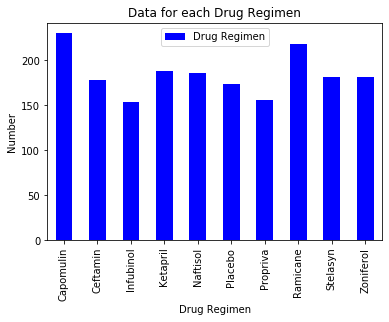

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
drug_groupby = new_combine.groupby('Drug Regimen')

#print(drug_groupby)
drug_count = pd.DataFrame(drug_groupby['Drug Regimen'].count())

countbar = drug_count.plot(kind ='bar', title="Data for each Drug Regimen", color="blue")

countbar.set_xlabel("Drug Regimen")
countbar.set_ylabel("Number")

plt.show()


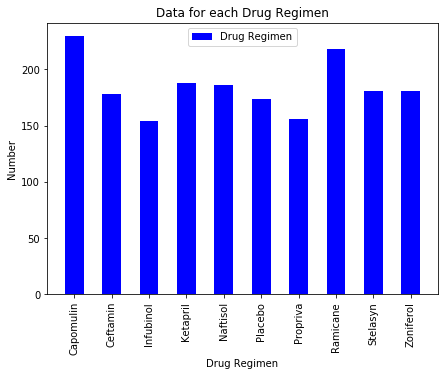

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(7,5))
plt.bar(x_axis, drug_count["Drug Regimen"], color='blue', align="center", width=0.5)
plt.xticks(tick_locations, list(drug_count.index), rotation="vertical")

plt.title("Data for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="upper center")
plt.show()



## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas & pyplots
mice_gender = new_combine['Sex'].value_counts()

print(mice_gender) 

Male      927
Female    919
Name: Sex, dtype: int64


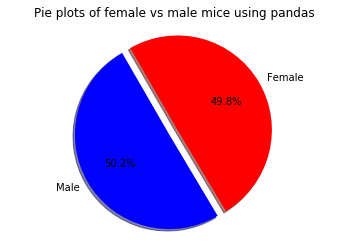

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Male = 927
Female = 919

size = (Male, Female)
explode = (0, 0.1)
labels = ['Male','Female']
colors = ['blue','red']
plt.title('Pie plots of female vs male mice using pandas')
plt.pie(size, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 120)

plt.axis('equal')
plt.show()

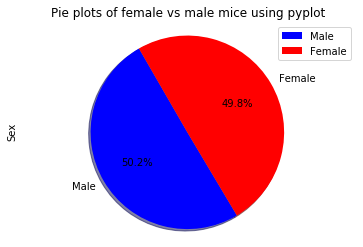

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender.plot(kind ='pie', y ='size',
                title ="Pie plots of female vs male mice using pyplot", startangle = 120,
                autopct ='%1.1f%%', shadow = True, fontsize = 10, colors = ["blue","red"], legend = True)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
regimens = new_combine[(new_combine["Drug Regimen"] == "Capomulin") | 
                          (new_combine["Drug Regimen"] == "Ramicane") | 
                          (new_combine["Drug Regimen"] == "Infubinol") | 
                          (new_combine["Drug Regimen"] == "Ceftamin")]

regimens = regimens[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimens = regimens.groupby(["Mouse ID", "Drug Regimen"])
regimen_df = regimens["Tumor Volume (mm3)"].sum().to_frame()
regimenPlot = regimen_df["Tumor Volume (mm3)"]

regimen_df.head()

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,563.127077
a251,Infubinol,552.370946
a275,Ceftamin,527.709651
a411,Ramicane,407.013854
a444,Ramicane,430.600524


In [60]:
# Quartile calculations
quartiles = regimenPlot.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


<Figure size 432x288 with 0 Axes>

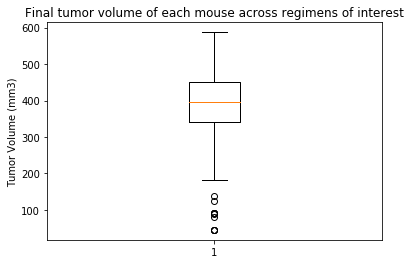

In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure()
fig, bx = plt.subplots()

bx.set_title('Final tumor volume of each mouse across regimens of interest')
bx.set_ylabel('Tumor Volume (mm3)')
bx.boxplot(regimenPlot)

plt.show()

## Line and Scatter Plots

In [16]:
# Tumor Response to Treatment (Time)

In [17]:
tumor_mean = new_combine.groupby(["Drug Regimen", "Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
tumor_mean 

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [18]:
table_mean = tumor_mean.pivot_table(values ="Tumor Volume (mm3)", index ="Timepoint", columns ="Drug Regimen")
table_mean.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.547189,47.389175,46.796098,47.178656,47.235574,44.018029,47.470830,46.851818
10,43.084291,48.285125,49.541086,49.582269,48.694210,49.408899,49.066132,42.513689,49.335368,48.689881
15,42.064317,50.094055,51.531662,52.399974,50.933018,51.419802,50.918900,41.617085,51.448025,50.779059
20,40.716325,52.157049,53.402991,54.920935,53.644087,54.364417,53.264805,40.390521,53.970080,53.170334


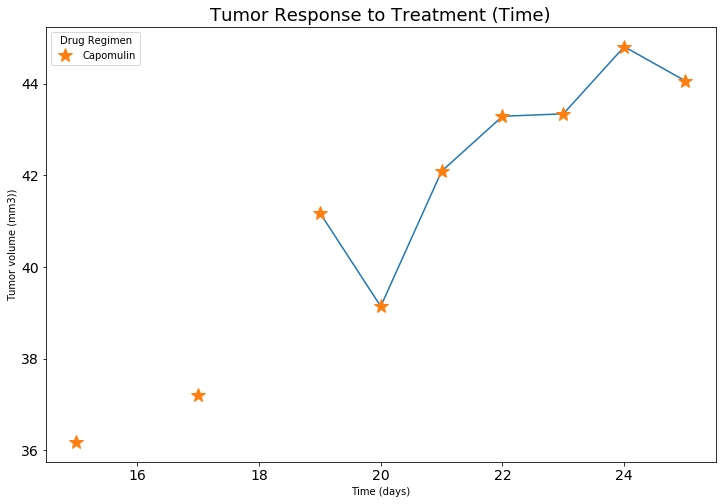

In [142]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df = table_mean[["Capomulin"]]
ax = df.plot(figsize = (12,8), legend = False)

#plot 1
df.plot(style = ['*'], markersize = 14, ax = ax)

plt.title("Tumor Response to Treatment (Time)").set_size(18)
plt.xlabel("Time (days)")
plt.ylabel("Tumor volume (mm3))")

ax.tick_params(axis ='x', labelsize = 14)
ax.tick_params(axis ='y', labelsize = 14)

plt.show()


In [20]:
# Tumor Response to Treatment (Weight)

In [21]:
tumor_mean = new_combine.groupby(["Drug Regimen", " Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
tumor_mean 

,Drug Regimen,Weight (g),Tumor Volume (mm3)
0,Capomulin,15,36.182040
1,Capomulin,17,37.214133
2,Capomulin,19,41.182391
3,Capomulin,20,39.141053
4,Capomulin,21,42.088700
...,...,...,...
62,Zoniferol,26,54.079939
63,Zoniferol,27,52.015995
64,Zoniferol,28,54.257071
65,Zoniferol,29,52.676301


In [22]:
table_mean = tumor_mean.pivot_table(values ="Tumor Volume (mm3)", index =" Weight (g)", columns ="Drug Regimen")
table_mean.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Weight (g),,,,,,,,,,
15,36.182040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.218630,NaN,NaN
17,37.214133,NaN,NaN,NaN,NaN,NaN,NaN,39.112697,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.882878,NaN,NaN
19,41.182391,NaN,NaN,NaN,NaN,NaN,NaN,39.798993,NaN,NaN


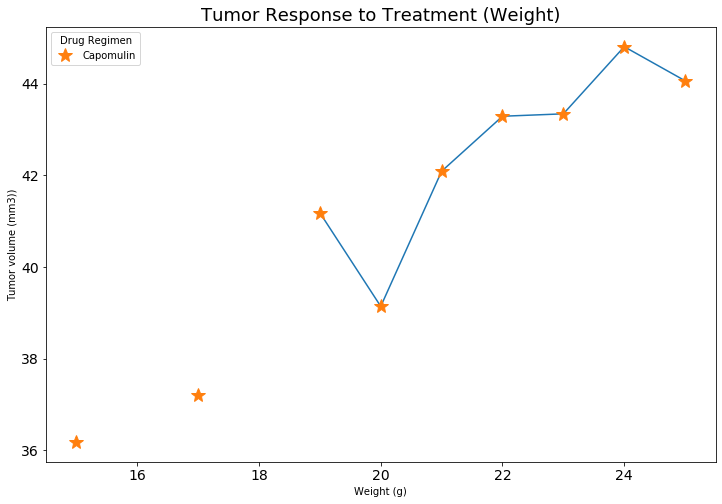

In [143]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df = table_mean[["Capomulin"]]

ax = df.plot(figsize = (12,8), legend = False)

#plot 2
df.plot(style = ['*'], markersize = 14, ax = ax)

plt.title("Tumor Response to Treatment (Weight)").set_size(18)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor volume (mm3))")

ax.tick_params(axis ='x', labelsize = 14)
ax.tick_params(axis ='y', labelsize = 14)

plt.show()

## Correlation and Regression

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [135]:
scatter = new_combine[(new_combine["Drug Regimen"] == "Capomulin")]
scatter = scatter[["Mouse ID", " Weight (g)", "Tumor Volume (mm3)"]]

groupby_scatter = scatter.groupby(["Mouse ID", " Weight (g)"])

scatter_df = groupby_scatter["Tumor Volume (mm3)"].mean().to_frame()
scatter_df = scatter_df.reset_index()
scatter_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


<Figure size 432x288 with 0 Axes>

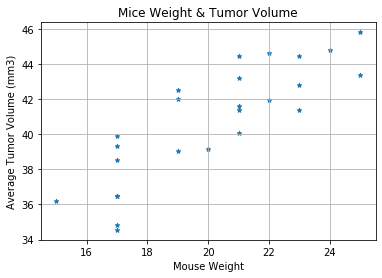

In [136]:
plt.figure()
scatter_df.plot(x = " Weight (g)", y ="Tumor Volume (mm3)", kind = "scatter", marker = "*")

plt.title("Mice Weight & Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

plt.show()

In [137]:
correlation = st.pearsonr(scatter_df[" Weight (g)"], scatterDataDF["Tumor Volume (mm3)"])

print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


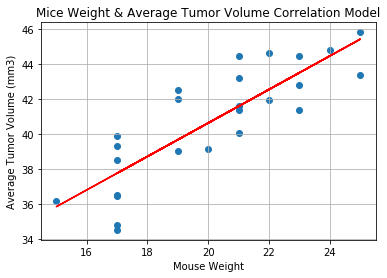

In [144]:
x_values = scatter_df[" Weight (g)"]
y_values = scatter_df["Tumor Volume (mm3)"]

plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.title("Mice Weight & Average Tumor Volume Correlation Model")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

plt.show()